### Exercise :1.1 (Simple linear Regression)

In [7]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

In [2]:
# these dataset is usually for the population respective profit of the city 
data=pd.read_csv("ex1data1.csv",names=["population","profit"])
data.info() # by this there is no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
population    97 non-null float64
profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [3]:
# also no need for the feature scalling , no categorical variable
# here we split the data in to the independent varible and the dependent  variable
x=data.iloc[:,0].values
y=data.iloc[:,1].values

In [4]:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

/home/sai/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


##### Implementing the Linear Regression from Scratch

In [5]:

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(77,)
(20,)
(77,)
(20,)


In [6]:
# reshaped of the datasets
X_train=X_train.reshape((77,1))
X_test=X_test.reshape((20,1))
Y_train=Y_train.reshape((77,1))
Y_test=Y_test.reshape((20,1))

#### Now Building the regression model 

In [34]:
def cost_error(features,targets,para,bias):
    pre=predict(features,para,bias)
    return sum((pre-targets)**2)/len(features)
def predict(features,para,bias):
    return (np.dot(features,para)+bias)
def GradientDecent(features,targets,para,bias,learning_rate):
    num_of_iters=1000
    m=len(features)
    for i in range(num_of_iters):
        pre=predict(features,para,bias)
        tar=pre-targets
        para=para-((learning_rate/m)*(np.dot(features.T,tar)))
        bias=bias-((learning_rate/m)*sum(tar))
    return para,bias

In [11]:
def Building_model(X_train,Y_train,X_test,Y_test):
    learning_rate=0.02
    para=2*np.random.random((X_train.shape[1],1))
    bias=rnd.random()
    print("the cost function test ",cost_error(X_test,Y_test,para,bias))
    print("___-------------------------------------")
    print("initial parameters and bias are :",para,bias)
    print("Initial Cost function is :",cost_error(X_train,Y_train,para,bias))
    para,bias=GradientDecent(X_train,Y_train,para,bias,learning_rate)
    print("___------------------------------------------")
    print("The final parameters and bias are :",para,bias)
    print("The final cost is :",cost_error(X_train,Y_train,para,bias))
    print("--------------------------------------------")
    Y_pre=predict(X_test,para,bias)
    print("the cost function test ",cost_error(X_test,Y_test,para,bias))
b=Building_model(X_train,Y_train,X_test,Y_test)

the cost function test  [33.29375507]
___-------------------------------------
initial parameters and bias are : [[1.28997426]] 0.7621691642160442
Initial Cost function is : [40.21061692]
___------------------------------------------
The final parameters and bias are : [[0.31147352]] [0.65112859]
The final cost is : [29.84426442]
--------------------------------------------
the cost function test  [18.35914641]


#### LInear Regression with the sklearn library

In [12]:
from sklearn.linear_model import LinearRegression
li=LinearRegression()
li.fit(X_train,Y_train)
y_pre=li.predict(X_test)

- from this we got two final set are :
- 1. "Y_pre" ---> from the linear Regression from scratch
- 2. "y_pre" ---> from the linear Regression of sklearn

#### Plotting the graphs by the traing set and test set 

NameError: name 'para' is not defined

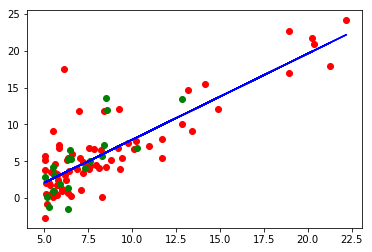

In [13]:
plt.scatter(X_train,Y_train,color="red")
plt.plot(X_train,li.predict(X_train),color='blue')
plt.scatter(X_test,Y_test,color="green")
plt.plot(X_train,predict(X_train,para,bias),color="green")
plt.show()

### Exercise-1.2 : Multiple Linear Regression

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
m_data=pd.read_csv("ex1data2.csv",names=["size","num_bedrooms","price"])
m_data.info() # As like as above there is no need for dealing with impurities

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
size            47 non-null int64
num_bedrooms    47 non-null int64
price           47 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


In [16]:
m_data.head()

,size,num_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [17]:
# here is need to feature scaling  there is a categorical variable which is given as the

In [18]:
# Feature scaling 
m_data["size"]=(m_data["size"]-m_data["size"].mean())/m_data["size"].std()
m_data["num_bedrooms"]=(m_data["num_bedrooms"]-m_data["num_bedrooms"].mean())/m_data["num_bedrooms"].std()
m_data["price"]=(m_data["price"]-m_data["price"].mean())/m_data["price"].std()       

In [19]:
# seperating the independent variable and dependent variable
x=m_data.iloc[:,:2].values
y=m_data.iloc[:,2].values

In [20]:
# reshaping the data
y=y.reshape((47,1))

In [21]:
# splitting in to the training and test set
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
# size of the splitting set
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (37, 2)
x_test : (10, 2)
y_train : (37, 1)
y_test : (10, 1)


In [30]:
learn_rate=0.02
# x_train,y_train,x_test,y_test  ----> are the datasets for the processing data
init_para=2*np.random.random((x_train.shape[1],1))-1
init_bias=rnd.random()

In [31]:
final_para,final_bias=GradientDecent(x_train,y_train,init_para,init_bias,learn_rate)

In [33]:
print(final_para,final_bias)

[[ 0.79975454]
 [-0.00957115]] [-0.02498138]


In [36]:
pre_y=predict(x_test,final_para,final_bias)

In [37]:
pre_y

array([[ 0.17774574],
       [ 1.12070256],
       [-0.17297189],
       [ 0.97025423],
       [ 0.57676852],
       [-0.02352573],
       [ 0.53450151],
       [-1.00472832],
       [-0.42204323],
       [-0.09648454]])

In [38]:
# building with the sklearn for multileple regression
from sklearn.linear_model import LinearRegression
le=LinearRegression()
le.fit(x_train,y_train)
Pre_Y=le.predict(x_test)

In [39]:
Pre_Y

array([[ 0.17782747],
       [ 1.12092397],
       [-0.17274997],
       [ 0.97026122],
       [ 0.57671722],
       [-0.02347381],
       [ 0.53444395],
       [-1.00443747],
       [-0.42205035],
       [-0.09663557]])